## Not A Unit Test :D 

In [6]:
import matplotlib.pyplot as plt
import numpy as np

try:
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
except ImportError:
    import sys
    import os
    module_path = os.path.abspath('..')
    sys.path.append(module_path)
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
    
np.set_printoptions(precision=5)

In [7]:
lincar = envs.LinearCar()

#policy_par = lambda par: (lambda x: par[0] + par[1:].dot(x))
#policy_grad = lambda x, a: np.array([1.,x[0],x[1]]) / a

policy_par = lambda par: (lambda x: np.exp(par[0] - par[1:].dot(x)) - 1.)
policy_grad = lambda x, a, par: np.array([1.,-x[0],-x[1]])*policy_par(par)(x)

policy = tools.Policy(policy_par,(3), gradient=policy_grad, sigma=0.2)
optimizer = srb.PolicyGradient(lincar, estimator='reinforce', max_it=4000, eps=0.000001,  
                               parameter_domain=np.array([0,5]), rate = 0.5)

In [8]:
policy.setParameter(np.array([1,1,1]))
trace = lincar.rollout(policy)
t = trace[10]
print(policy.log_grad(t[1],t[0]))

[-1.66509  1.00987  0.14587]


In [10]:
par, conv = optimizer.optimize(policy)

Start Reinforce optimization:
Initial Parameters: [ 1.27473  0.75103  2.39949]
Run: 0  	Parameter: 	[ 1.27473  0.75103  2.39949]	Reward: -100.047302304
		Gradient: 	[  7.98819e-04  -1.89841e-04  -2.18465e-05]
Run: 100  	Parameter: 	[ 1.26511  0.75415  2.39975]	Reward: -98.1455685358
		Gradient: 	[ -9.96028e-04   1.32939e-04   2.80543e-05]
		Average Time: 	0.02s/step
Run: 200  	Parameter: 	[ 1.24868  0.75489  2.40029]	Reward: -92.6804705632
		Gradient: 	[ -1.26690e-03  -3.00222e-04  -4.64221e-06]
		Average Time: 	0.02s/step
Run: 300  	Parameter: 	[ 1.228    0.75438  2.40088]	Reward: -86.9035487877
		Gradient: 	[ -1.90528e-03  -6.98897e-06   7.35046e-05]
		Average Time: 	0.02s/step
Run: 400  	Parameter: 	[ 1.21541  0.75501  2.40136]	Reward: -85.6587485628
		Gradient: 	[ -8.16401e-04   1.58424e-04   2.76060e-05]
		Average Time: 	0.02s/step
Run: 500  	Parameter: 	[ 1.1958   0.75602  2.40211]	Reward: -75.2430850167
		Gradient: 	[ 0.00302 -0.00063 -0.0001 ]
		Average Time: 	0.02s/step
Run: 6

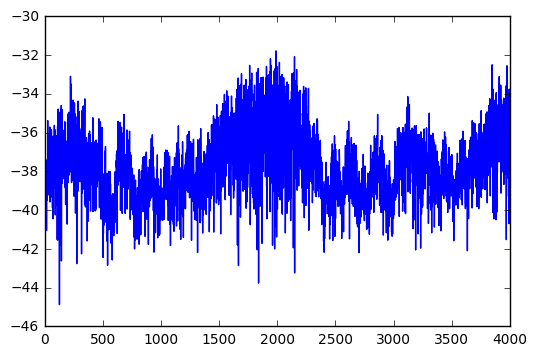

In [23]:
rewards = optimizer.rewards
plt.plot(np.arange(0,len(rewards)),rewards)
plt.show()

Best Parameter:	[ 2.52935  3.32993  4.34422]
Best Reward: 	-31.7775232795


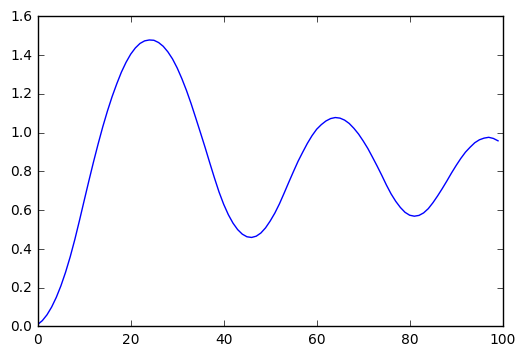

In [24]:
print("Best Parameter:\t"+str(optimizer.best_parameter))
print("Best Reward: \t"+str(optimizer.best_reward))

policy.setParameter(optimizer.best_parameter)
trace = lincar.rollout(policy)

y = np.array([t[0] for t in [s[1] for s in trace]])
x = np.arange(0,len(trace))

plt.plot(x,y)
plt.show()

In [10]:
optimizer.parameters

[array([ 0.36703,  0.87473,  0.66056]),
 array([ 0.3705 ,  0.87479,  0.66051]),
 array([ 0.36939,  0.87536,  0.6605 ]),
 array([ 0.37201,  0.87434,  0.66053]),
 array([ 0.37319,  0.8746 ,  0.66057]),
 array([ 0.37439,  0.87486,  0.66054]),
 array([ 0.37576,  0.87403,  0.66052]),
 array([ 0.37451,  0.87396,  0.66053]),
 array([ 0.37816,  0.87353,  0.6605 ]),
 array([ 0.38144,  0.87318,  0.66049]),
 array([ 0.38368,  0.87396,  0.66051]),
 array([ 0.38252,  0.87461,  0.66056]),
 array([ 0.3845 ,  0.87551,  0.66059]),
 array([ 0.38808,  0.87425,  0.66058]),
 array([ 0.38861,  0.8757 ,  0.66065]),
 array([ 0.38675,  0.87788,  0.66069]),
 array([ 0.39127,  0.87725,  0.66066]),
 array([ 0.39793,  0.87629,  0.66058]),
 array([ 0.39915,  0.87539,  0.66059]),
 array([ 0.39809,  0.876  ,  0.6606 ]),
 array([ 0.39448,  0.87642,  0.66065]),
 array([ 0.39671,  0.87712,  0.66065]),
 array([ 0.39948,  0.87747,  0.66067]),
 array([ 0.40625,  0.8765 ,  0.66059]),
 array([ 0.40493,  0.87623,  0.66058]),
